In [47]:

import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'Arial'
figpath = '../figures/figure2'
os.makedirs(figpath, exist_ok=True)
datapath = '../data'

In [45]:
adata_epi_norm = sc.read_h5ad(f"{datapath}/adata-epi-norm.h5ad")
adata_epi_norm

AnnData object with n_obs × n_vars = 15756 × 39735
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'majorType-fix', 'cnv_leiden', 'cnv_score', 'cnv_status', 'IHC', 'epi-leiden', 'epi-normtype'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'CellphoneDB', 'IHC_colors', 'batch_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_epi-leiden', 'dendrogram_leiden', 'epi-leiden_colors', 'epi-normtype_colors', 'epi-subtype_colors', 'gender_colors', 

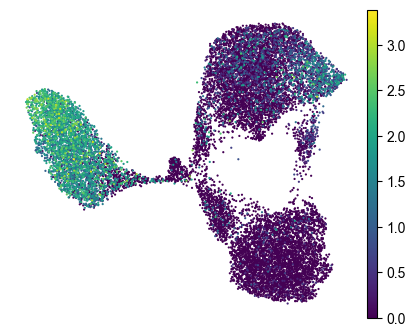

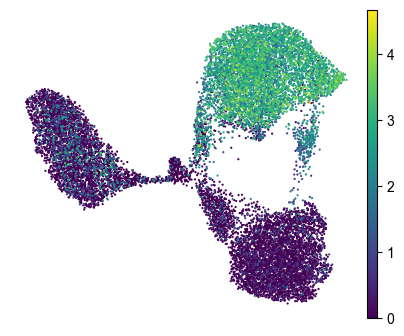

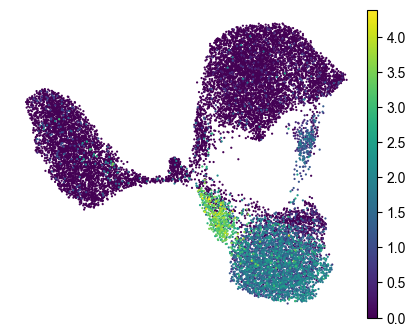

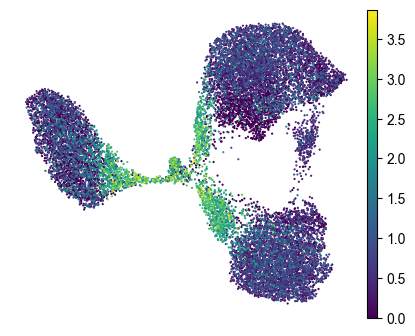

In [32]:
for gene in ['KRT5', 'KRT15', 'ANKRD30A', 'XIST']:
  fig, ax = plt.subplots(1, 1, figsize=(5, 4))
  sc.pl.umap(adata_epi_norm, color=gene,size=10, ax=ax, title='',show=False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.set_xlabel("")
  ax.set_ylabel("")
  # ax.legend(  handletextpad=0.5, frameon=False,
  #                     borderpad=0.6,
  #                     columnspacing=1.3,
  #                     handlelength=0.65, fontsize=12)
  fig.savefig(f"{figpath}/S1f-{gene}.png", dpi=400, bbox_inches='tight')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


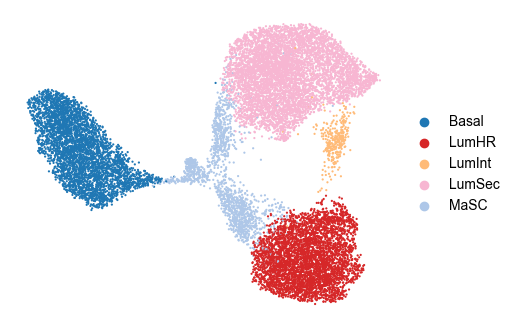

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sc.pl.umap(adata_epi_norm, color=['epi-normtype'],size=10, ax=ax, title='',show=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
# ax.legend(  handletextpad=0.5, frameon=False,
#                     borderpad=0.6,
#                     columnspacing=1.3,
#                     handlelength=0.65, fontsize=12)
fig.savefig(f"{figpath}/2a-normtype.png", dpi=400, bbox_inches='tight')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


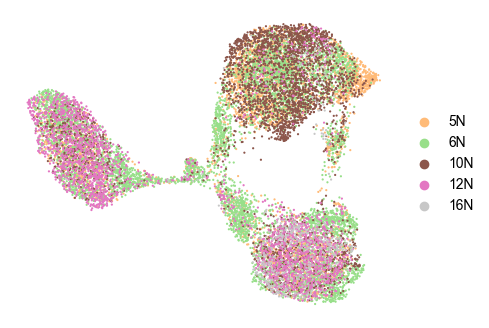

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sc.pl.umap(adata_epi_norm, color=['batch'],size=10, ax=ax, title='',show=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
# ax.legend(  handletextpad=0.5, frameon=False,
#                     borderpad=0.6,
#                     columnspacing=1.3,
#                     handlelength=0.65, fontsize=12)
fig.savefig(f"{figpath}/S1h-batch.png", dpi=400, bbox_inches='tight')

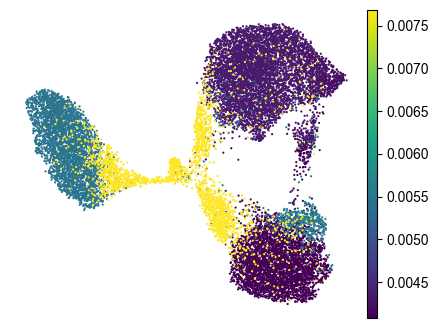

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sc.pl.umap(adata_epi_norm, color=['cnv_score'],size=10, ax=ax, title='',show=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
# ax.legend(  handletextpad=0.5, frameon=False,
#                     borderpad=0.6,
#                     columnspacing=1.3,
#                     handlelength=0.65, fontsize=12)
fig.savefig(f"{figpath}/S1i-cnv.png", dpi=400, bbox_inches='tight')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


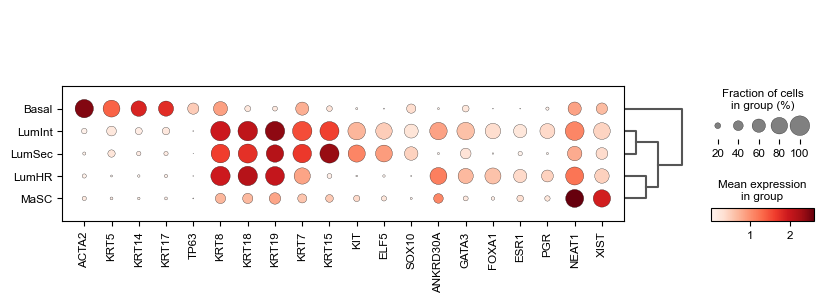

In [ ]:
sc.pl.dotplot(adata_epi_norm, var_names=['ACTA2','KRT5', 'KRT14', 'KRT17','TP63', 'KRT8', 'KRT18', 'KRT19',  'KRT7','KRT15',
                                          'KIT','ELF5','SOX10','ANKRD30A','GATA3','FOXA1','ESR1','PGR', 'NEAT1', 'XIST'], groupby='epi-normtype', dendrogram=True, save='2c_epikrt1.svg')

In [48]:
def propPlot(age_df, barlabels, ax, colors=sc.pl.palettes.default_20, xlabel='Patient ID', show_y=True, xrotate=90):
    all_df = age_df.sum(axis=1)
    age_normdf = pd.DataFrame([age_df.loc[i,:]/all_df[i] for i in barlabels], index=barlabels)
    age_cumdf = pd.DataFrame([np.cumsum(age_normdf.loc[i,:]) for i in barlabels], index=barlabels)
    norm_gdfs = age_normdf
    cum_gdfs = age_cumdf
    for i, col in enumerate(age_df.columns):
        height = norm_gdfs[col]
        starts = cum_gdfs[col] - height
        rects = ax.bar(barlabels, height, bottom=starts, width=0.9, color=colors[i], edgecolor='white', linewidth=0.5,
                        label=col, alpha=1)
    
        # ax.bar_label(rects,age_df.loc[:, col], label_type='center', color='lightgrey', fontsize=14)
    ax.legend( bbox_to_anchor=(1, -0.3), 
              handletextpad=0.5, frameon=False,
                          borderpad=0.4,
                          columnspacing=1,
                          handlelength=0.65,
              loc='lower left')
    if show_y:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.set_ylabel('Cell proportions')
    else:
        ax.yaxis.set_visible(False)
        ax.spines.left.set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_xticks(barlabels)
    ax.set_xticklabels(labels=barlabels,rotation=xrotate)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

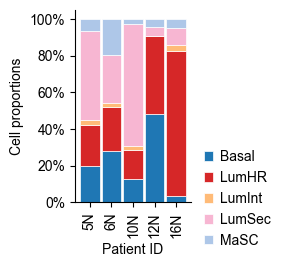

In [49]:
barlabels = ['5N', '6N', '10N', '12N','16N']
cell_types = ['Basal','LumHR', 'LumInt', 'LumSec', 'MaSC']
# colors = pd.Series(sc.pl.palettes.default_20[:9], index=adata.obs['majorType-fix'].cat.categories)
colors = ['#1f77b4', '#d62728','#ffbb78','#f7b6d2','#aec7e8']
age_df = pd.DataFrame(columns = list(cell_types))
for bar in barlabels:
    d1 = pd.DataFrame([len(adata_epi_norm[(adata_epi_norm.obs["epi-normtype"] == ct) & (adata_epi_norm.obs["batch"] == bar)]) for ct in list(cell_types)], index = list(cell_types), columns=[bar]).T
    age_df = pd.concat([age_df, d1])
fig0, ax0 = plt.subplots(figsize=(1.5, 2.5))
propPlot(age_df, barlabels, ax0, colors=colors)
fig0.savefig(f"{figpath}/2b-proportions.svg",bbox_inches='tight')